<a href="https://colab.research.google.com/github/divyadharaa/AI-Labsheet--3--021374/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AI LABSHEET: AGENTS AND KNN**


**Name**: Salina Kunwar





**# AGENTS**

Step 1: Agent at (0, 0), Status: Dirty, Action: Clean


/tmp/ipython-input-1-4288610165.py:55: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(1.0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


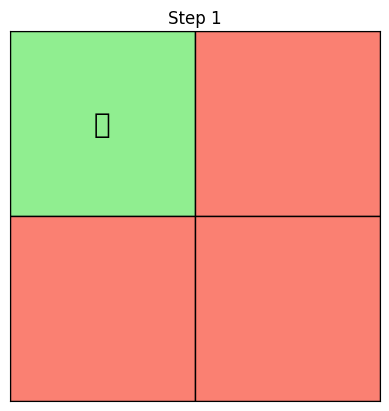

Step 2: Agent at (0, 0), Status: Clean, Action: (0, 1)


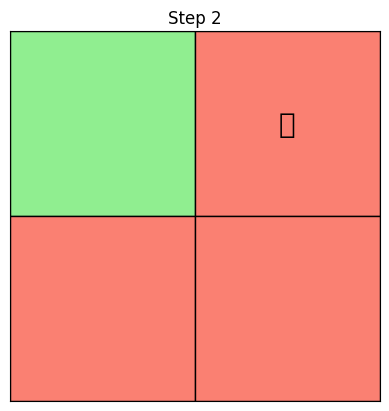

Step 3: Agent at (0, 1), Status: Dirty, Action: Clean


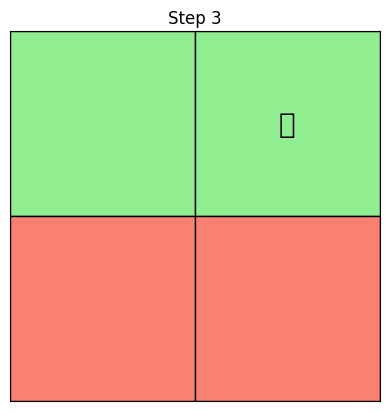

Step 4: Agent at (0, 1), Status: Clean, Action: (1, 0)


/tmp/ipython-input-1-4288610165.py:55: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(1.0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


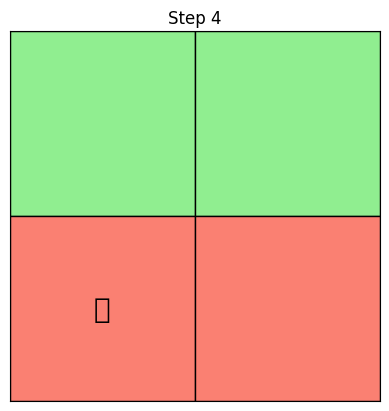

Step 5: Agent at (1, 0), Status: Dirty, Action: Clean


/tmp/ipython-input-1-4288610165.py:55: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(1.0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


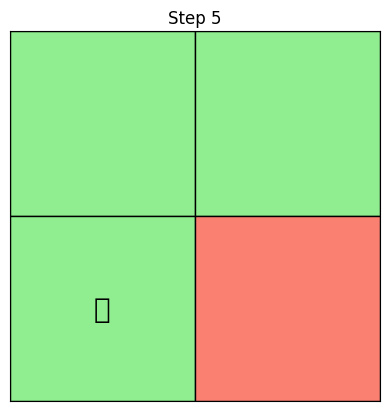

Step 6: Agent at (1, 0), Status: Clean, Action: (1, 1)


/tmp/ipython-input-1-4288610165.py:55: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(1.0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


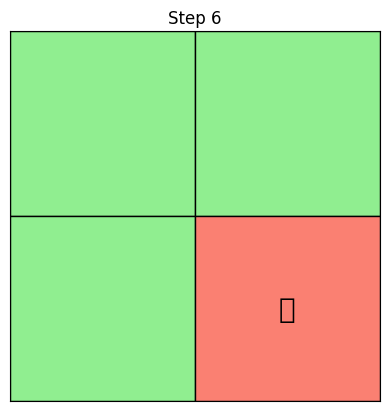

Step 7: Agent at (1, 1), Status: Dirty, Action: Clean


/tmp/ipython-input-1-4288610165.py:55: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.pause(1.0)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


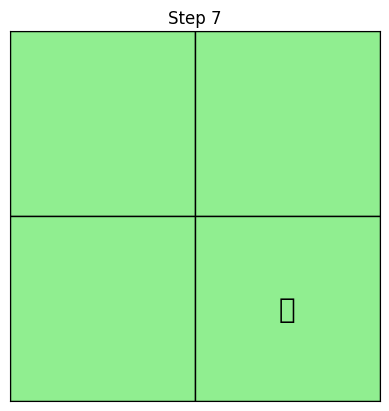

In [1]:
import matplotlib.pyplot as plt
import random
import time

# Initialize 2x2 grid environment with all dirty
grid = {
    (0, 0): 'Dirty',
    (0, 1): 'Dirty',
    (1, 0): 'Dirty',
    (1, 1): 'Dirty'
}

# Agent starts at (0, 0)
agent_pos = (0, 0)

# Simple reflex agent function
def reflex_agent(position, status):
    if status == 'Dirty':
        return 'Clean'
    else:
        # Random movement (up/down/left/right) within grid
        moves = {
            'up': (position[0]-1, position[1]),
            'down': (position[0]+1, position[1]),
            'left': (position[0], position[1]-1),
            'right': (position[0], position[1]+1)
        }
        valid_moves = [pos for pos in moves.values() if pos in grid]
        return random.choice(valid_moves)

# Visualization function
def visualize(grid, agent_pos, step):
    color_map = {'Clean': 'lightgreen', 'Dirty': 'salmon'}
    fig, ax = plt.subplots()
    plt.title(f"Step {step}")

    # 4 grid cells are drawn
    for x in [0, 1]:
        for y in [0, 1]:
            status = grid.get((x, y), 'Dirty')
            # Draw each room
            rect = plt.Rectangle((y, 1 - x), 1, 1, facecolor=color_map[status], edgecolor='black')
            ax.add_patch(rect)

            # Draw agent
            if (x, y) == agent_pos:
                ax.text(y + 0.5, 1 - x + 0.5, '🤖', ha='center', va='center', fontsize=20)

    # Set correct plot limits and formatting
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.pause(1.0)
    plt.close()



# Keep track of visited positions
visited = set()

# Improved reflex agent (cleans or visits new cells)
def reflex_agent(position, status):
    if status == 'Dirty':
        return 'Clean'
    else:
        # Move to any unvisited or randomly if all visited
        possible_moves = [
            (0, 0), (0, 1),
            (1, 0), (1, 1)
        ]
        unvisited = [pos for pos in possible_moves if pos not in visited]
        if unvisited:
            return unvisited[0]  # visit next unvisited
        else:
            return random.choice(possible_moves)  # fallback

# Simulation loop (run until all rooms are clean)
step = 1
while 'Dirty' in grid.values():
    status = grid[agent_pos]
    action = reflex_agent(agent_pos, status)

    print(f"Step {step}: Agent at {agent_pos}, Status: {status}, Action: {action}")

    if action == 'Clean':
        grid[agent_pos] = 'Clean'
        visited.add(agent_pos)
    else:
        agent_pos = action

    visualize(grid, agent_pos, step)
    step += 1


# **GOAL BASED AGENT**

In [2]:
romania_map = {
    'Arad': ['Zerind', 'Sibiu', 'Timisoara'],
    'Zerind': ['Arad', 'Oradea'],
    'Oradea': ['Zerind', 'Sibiu'],
    'Sibiu': ['Arad', 'Oradea', 'Fagaras', 'Rimnicu Vilcea'],
    'Fagaras': ['Sibiu', 'Bucharest'],
    'Rimnicu Vilcea': ['Sibiu', 'Pitesti', 'Craiova'],
    'Timisoara': ['Arad', 'Lugoj'],
    'Lugoj': ['Timisoara', 'Mehadia'],
    'Mehadia': ['Lugoj', 'Drobeta'],
    'Drobeta': ['Mehadia', 'Craiova'],
    'Craiova': ['Drobeta', 'Rimnicu Vilcea', 'Pitesti'],
    'Pitesti': ['Rimnicu Vilcea', 'Craiova', 'Bucharest'],
    'Bucharest': ['Fagaras', 'Pitesti', 'Giurgiu', 'Urziceni'],
    'Giurgiu': ['Bucharest'],
    'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'],
    'Hirsova': ['Urziceni', 'Eforie'],
    'Eforie': ['Hirsova'],
    'Vaslui': ['Urziceni', 'Iasi'],
    'Iasi': ['Vaslui', 'Neamt'],
    'Neamt': ['Iasi']
}

class GoalDrivenAgent:
    def __init__(self, environment, start, goal):
        self.environment = environment
        self.current_city = start
        self.goal = goal
        self.path = [start]  # Keep track of the path taken

    def perceive(self):
        # Returns current city
        return self.current_city

    def decide_action(self):
        if self.current_city == self.goal:
            return None  # Goal reached

        # Simple decision: move to any connected city not yet visited,
        # or towards the goal if connected.
        neighbors = self.environment[self.current_city]

        # If goal is directly connected, move there
        if self.goal in neighbors:
            return self.goal

        # Otherwise, pick the next city not in path to avoid cycles
        for city in neighbors:
            if city not in self.path:
                return city

        # If all neighbors visited, just pick first neighbor (not optimal but works)
        return neighbors[0]

    def act(self, next_city):
        self.current_city = next_city
        self.path.append(next_city)

    def run(self):
        print(f"Starting at {self.current_city}, goal is {self.goal}")
        while self.current_city != self.goal:
            print(f"Current city: {self.current_city}")
            next_city = self.decide_action()
            if next_city is None:
                break
            print(f"Moving to: {next_city}")
            self.act(next_city)
        print(f"Goal {self.goal} reached!")
        print("Path taken:", " -> ".join(self.path))


# Example usage:
agent = GoalDrivenAgent(romania_map, start='Arad', goal='Bucharest')
agent.run()

Starting at Arad, goal is Bucharest
Current city: Arad
Moving to: Zerind
Current city: Zerind
Moving to: Oradea
Current city: Oradea
Moving to: Sibiu
Current city: Sibiu
Moving to: Fagaras
Current city: Fagaras
Moving to: Bucharest
Goal Bucharest reached!
Path taken: Arad -> Zerind -> Oradea -> Sibiu -> Fagaras -> Bucharest


# **UTILITY BASED AGENT**

In [3]:
# Simple Romania map neighbors
romania_map = {
    'Arad': ['Zerind', 'Sibiu', 'Timisoara'],
    'Zerind': ['Arad', 'Oradea'],
    'Oradea': ['Zerind', 'Sibiu'],
    'Sibiu': ['Arad', 'Oradea', 'Fagaras'],
    'Fagaras': ['Sibiu', 'Bucharest'],
    'Timisoara': ['Arad'],
    'Bucharest': []
}

# Simple heuristic (distance to Bucharest)
heuristic = {
    'Arad': 366,
    'Zerind': 374,
    'Oradea': 380,
    'Sibiu': 253,
    'Fagaras': 176,
    'Timisoara': 329,
    'Bucharest': 0
}

class SimpleUtilityAgent:
    def __init__(self, environment, heuristic, start, goal):
        self.env = environment
        self.heuristic = heuristic
        self.current = start
        self.goal = goal
        self.path = [start]

    def next_move(self):
        if self.current == self.goal:
            return None
        neighbors = self.env[self.current]
        # Pick neighbor with smallest heuristic (closest to goal)
        next_city = min(neighbors, key=lambda city: self.heuristic[city])
        return next_city

    def move(self):
        next_city = self.next_move()
        if next_city:
            self.current = next_city
            self.path.append(next_city)

    def run(self):
        print(f"Starting at {self.current}, goal is {self.goal}")
        while self.current != self.goal:
            print(f"At {self.current}, moving to next best city...")
            self.move()
        print(f"Reached {self.goal}!")
        print("Path:", " -> ".join(self.path))

# Run example
agent = SimpleUtilityAgent(romania_map, heuristic, start='Arad', goal='Bucharest')
agent.run()


Starting at Arad, goal is Bucharest
At Arad, moving to next best city...
At Sibiu, moving to next best city...
At Fagaras, moving to next best city...
Reached Bucharest!
Path: Arad -> Sibiu -> Fagaras -> Bucharest


# **KNN FIXED FEATURES**

In [4]:
from collections import Counter
import math

# Example dataset: Each item is ([feature1, feature2], label)
data = [
    ([1, 2], 'Class A'),
    ([2, 3], 'Class A'),
    ([3, 3], 'Class B'),
    ([6, 5], 'Class B')
]

# Function to calculate Euclidean distance between two points with 2 features
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# KNN function
def knn(test_point, data, k=3):
    distances = []
    for features, label in data:
        dist = euclidean_distance(test_point, features)
        distances.append((dist, label))
    distances.sort(key=lambda x: x[0])  # Sort by distance

    # Get labels of k closest points
    k_labels = [label for _, label in distances[:k]]

    # Return the most common label among neighbors
    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common

# Test example
test_point = [3, 2]
predicted_class = knn(test_point, data, k=3)
print(f"The test point {test_point} is classified as: {predicted_class}")

The test point [3, 2] is classified as: Class A


# **KNN ARBITRARY FEATURES**

In [5]:
from collections import Counter

data = [
    ([1, 2, 3], 'A'),
    ([2, 3, 4], 'A'),
    ([5, 5, 5], 'B'),
    ([6, 7, 8], 'B')
]

def distance(p1, p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i] - p2[i]) ** 2
    return total ** 0.5

def knn(test_point, data, k=3):
    distances = []
    for features, label in data:
        dist = distance(test_point, features)
        distances.append((dist, label))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]
    most_common = Counter(labels).most_common(1)[0][0]
    return most_common

test = [3, 3, 3]
print("Classified as:", knn(test, data))


Classified as: A


# **KNN VISUALIZATION FOR 2 FIXED FEATURES**

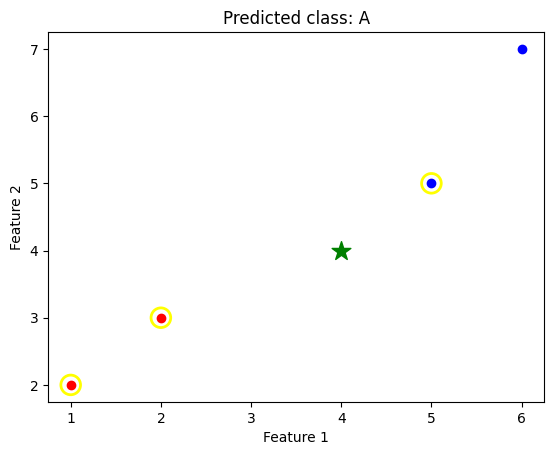

Classified as: A


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Simple 2-feature dataset
data = [
    ([1, 2], 'A'),
    ([2, 3], 'A'),
    ([5, 5], 'B'),
    ([6, 7], 'B')
]

def distance(p1, p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i] - p2[i]) ** 2
    return total ** 0.5

def knn(test_point, data, k=3):
    distances = []
    for features, label in data:
        dist = distance(test_point, features)
        distances.append((dist, label, features))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label, _ in neighbors]
    prediction = Counter(labels).most_common(1)[0][0]

    # Plot all points
    for features, label in data:
        color = 'red' if label == 'A' else 'blue'
        plt.scatter(features[0], features[1], c=color)

    # Highlight neighbors with yellow circle
    for _, _, features in neighbors:
        plt.scatter(features[0], features[1], facecolors='none', edgecolors='yellow', s=200, linewidths=2)

    # Plot test point as green star
    plt.scatter(test_point[0], test_point[1], c='green', marker='*', s=200)
    plt.title(f'Predicted class: {prediction}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return prediction

test_point = [4, 4]
print("Classified as:", knn(test_point, data))